# Домашнее задание "Временные ряды, общая теория" (Знакомство с временными рядами)

Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

# Решение

In [1]:
import pandas
from matplotlib import pyplot
import numpy

### Подготовка данных

In [2]:
def get_all_series():
    sales_of_company_x = pandas.read_csv('Lecture/Series/monthly-sales-of-company-x-jan-6.csv')
    robberies_in_boston = pandas.read_csv('Lecture/Series/monthly-boston-armed-robberies-j.csv')
    airlines_passengers = pandas.read_csv('Lecture/Series/international-airline-passengers.csv')
    mean_monthly_temp = pandas.read_csv('Lecture/Series/mean-monthly-air-temperature-deg.csv')
    dowjones_closing = pandas.read_csv('Lecture/Series/weekly-closings-of-the-dowjones-.csv')
    female_births = pandas.read_csv('Lecture/Series/daily-total-female-births-in-cal.csv')

    return {
        'Monthly sales of company X': sales_of_company_x['Count'],
        'Monthly Boston armed robberies': robberies_in_boston['Count'],
        'International airline passengers: monthly totals in thousands': airlines_passengers['Count'],
        'Mean monthly air temperature (Deg. F) Nottingham Castle': mean_monthly_temp['Deg'],
        'Weekly closings of the Dow-Jones industrial average': dowjones_closing['Close'],
        'Daily total female births in California': female_births['Count']
    }

all_series = get_all_series()

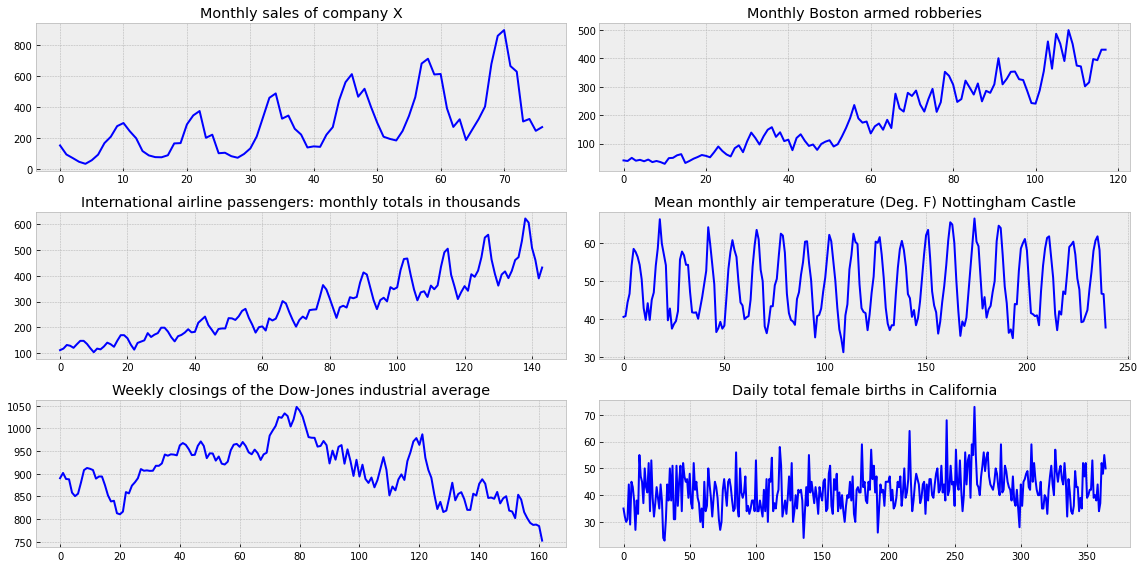

In [3]:
def show_series(series):
    with pyplot.style.context('bmh'):
        pyplot.figure(figsize=(16, 8))
        layout = (3, 2)

        for series_index, key in enumerate(series.keys()):
            x = series_index % 2
            y = int((series_index - x) / 2)

            ts_ax = pyplot.subplot2grid(layout, (y, x))
            series[key].plot(ax=ts_ax, color='blue')
            ts_ax.set_title(key)

        pyplot.tight_layout()

show_series(series=all_series)

### Вспомогатлеьные функции

In [4]:
from scipy.stats import boxcox

def normalization_series(series):
    '''Нормализуем дисперсию'''

    boxcox_series = boxcox(series, 0)

    with pyplot.style.context('bmh'):
        pyplot.figure(figsize=(16, 5))
        pyplot.plot(boxcox_series, color='blue')
        pyplot.show()

    return boxcox_series

In [5]:
def differentiation_series(series):
    '''Дифференцируем'''

    diff_series = numpy.diff(series, 1)

    with pyplot.style.context('bmh'):
        pyplot.figure(figsize=(16, 5))
        pyplot.plot(diff_series, color='blue')
        pyplot.show()

    return diff_series

In [6]:
from statsmodels.tsa.stattools import adfuller

def print_test_stationarity(series):
    '''Dickey-Fuller'''

    dftest = adfuller(series, autolag='AIC')
    dfoutput = pandas.Series(
        dftest[0:4],
        index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value

    print(dfoutput)

In [7]:
import statsmodels.tsa.api as tsa_api

def print_correlograms(series, lags=None, figsize=(14, 8), style='bmh'):
    '''Коррелограммы'''
    if not isinstance(series, pandas.Series):
        series = pandas.Series(series)

    with pyplot.style.context(style):
        pyplot.figure(figsize=figsize)

    layout = (4, 1)
    ts_ax = pyplot.subplot2grid(layout, (0, 0), rowspan=2)
    acf_ax = pyplot.subplot2grid(layout, (2, 0))
    pacf_ax = pyplot.subplot2grid(layout, (3, 0))

    series.plot(ax=ts_ax, color='blue', label='Or')
    ts_ax.set_title('Original')

    tsa_api.graphics.plot_acf(series, lags=lags, ax=acf_ax, alpha=0.05)
    tsa_api.graphics.plot_pacf(series, lags=lags, ax=pacf_ax, alpha=0.05)

    pyplot.tight_layout()
    pyplot.show()

In [8]:
def transform_to_stationary(series, normalization_callback, differentiation_callback):
    update_series = series

    print('Нормализуем дисперсию:')
    update_series = normalization_callback(update_series)

    print('Дифференцируем:')
    update_series = differentiation_callback(update_series)

    print('Тест Dickey-Fuller:')
    print_test_stationarity(update_series)

    print('\nКоррелограммы:')
    print_correlograms(update_series)

### Временной ряд - Monthly sales of company X

Нормализуем дисперсию:


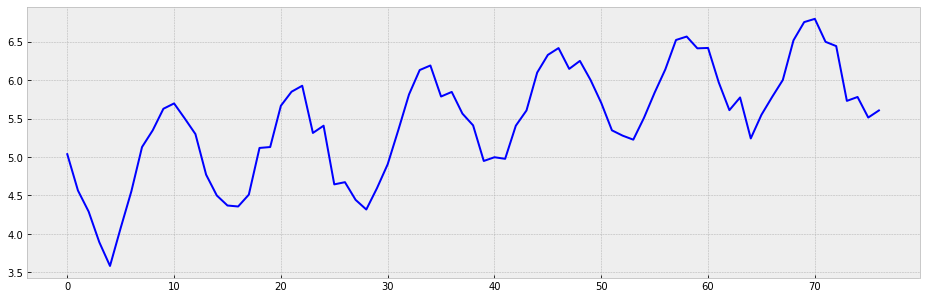

Дифференцируем:


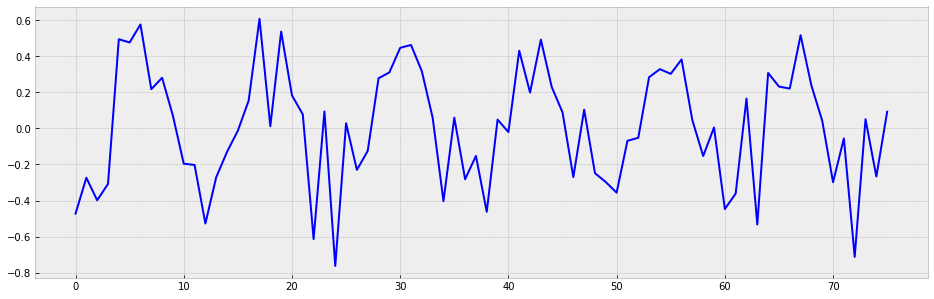

Тест Dickey-Fuller:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

Коррелограммы:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


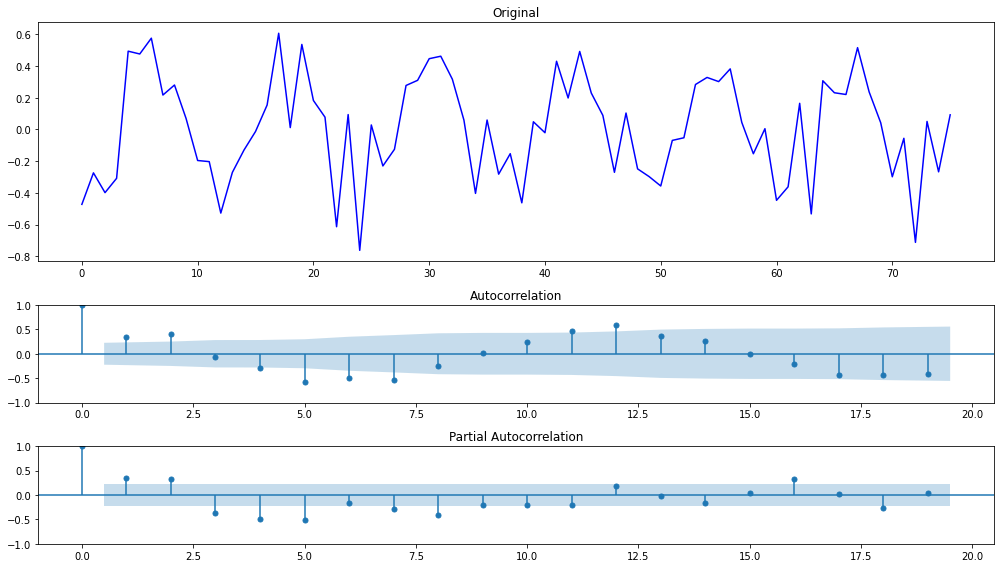

In [9]:
transform_to_stationary(
    series=all_series['Monthly sales of company X'],
    normalization_callback=normalization_series,
    differentiation_callback=differentiation_series)

### Временной ряд - Monthly Boston armed robberies

Нормализуем дисперсию:


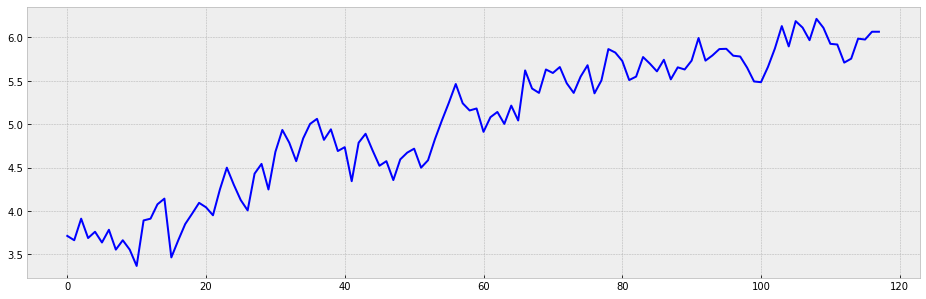

Дифференцируем:


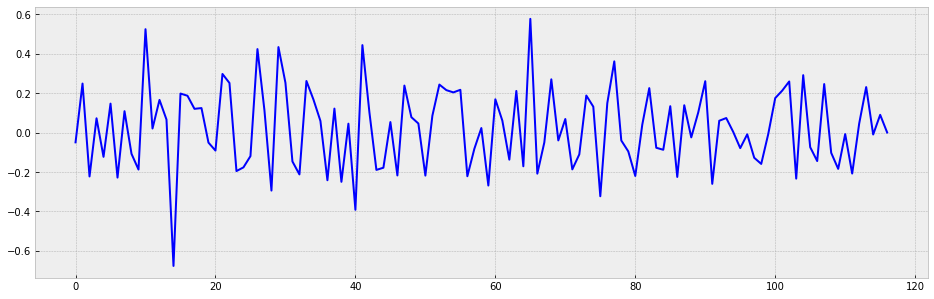

Тест Dickey-Fuller:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64

Коррелограммы:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


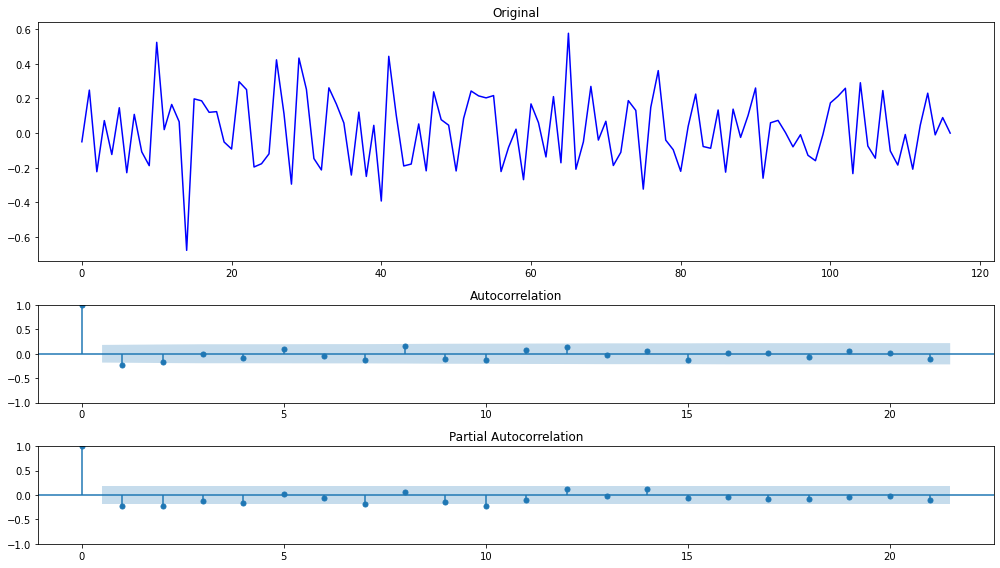

In [10]:
transform_to_stationary(
    series=all_series['Monthly Boston armed robberies'],
    normalization_callback=normalization_series,
    differentiation_callback=differentiation_series)

### Временной ряд - International airline passengers: monthly totals in thousands

Нормализуем дисперсию:


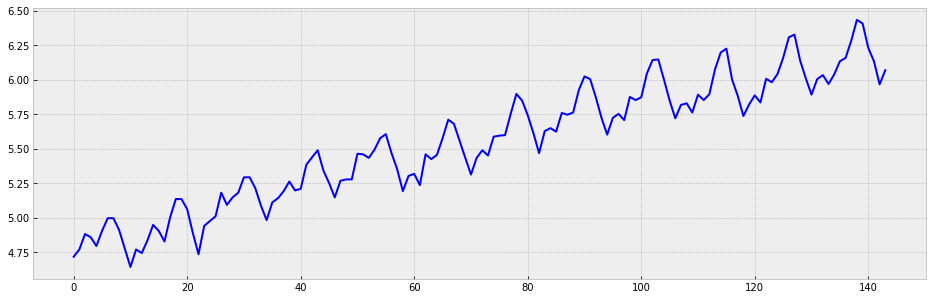

Дифференцируем:


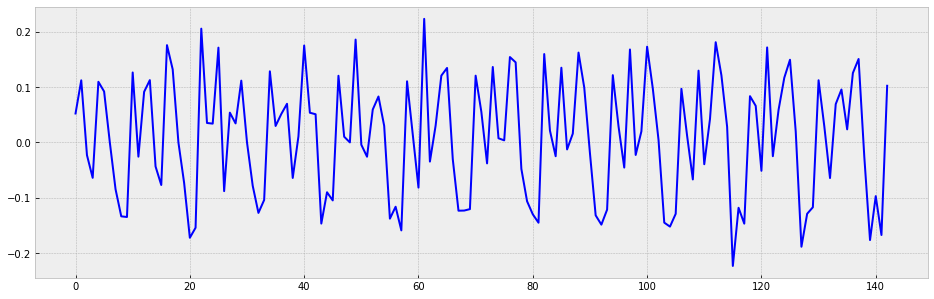

Тест Dickey-Fuller:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64

Коррелограммы:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


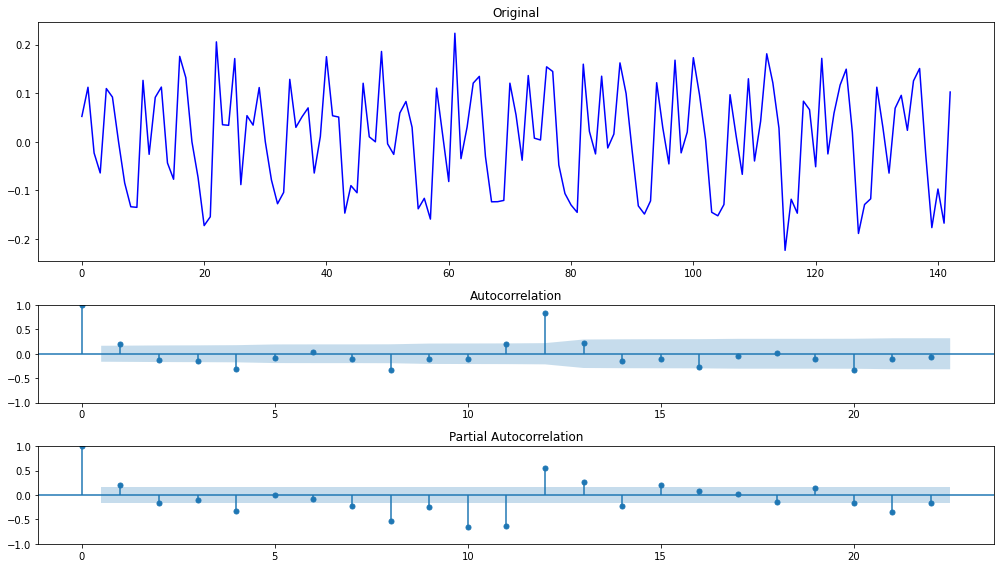

In [11]:
transform_to_stationary(
    series=all_series['International airline passengers: monthly totals in thousands'],
    normalization_callback=normalization_series,
    differentiation_callback=differentiation_series)

### Временной ряд - Mean monthly air temperature (Deg. F) Nottingham Castle

Нормализуем дисперсию:


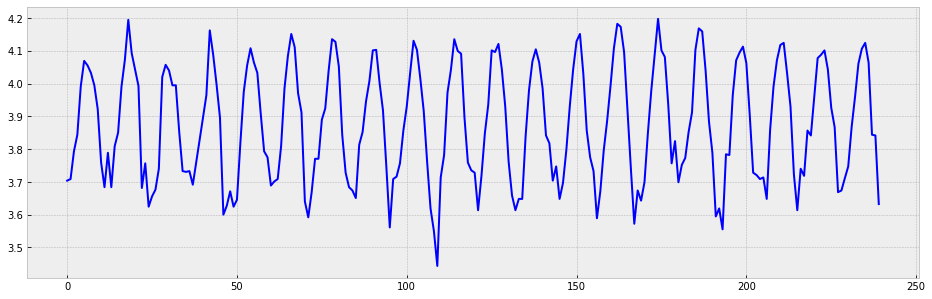

Дифференцируем:


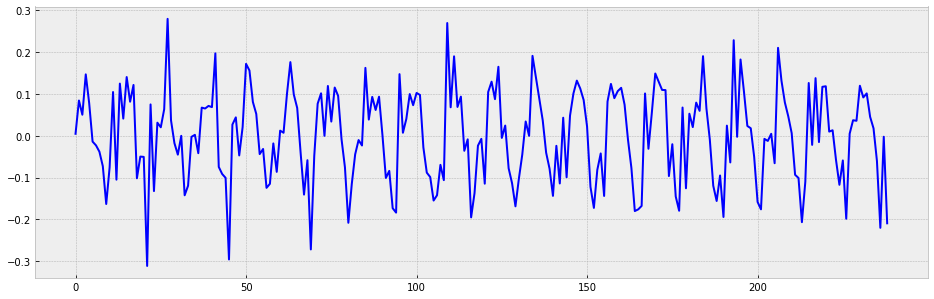

Тест Dickey-Fuller:
Test Statistic                -1.214226e+01
p-value                        1.640728e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64

Коррелограммы:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


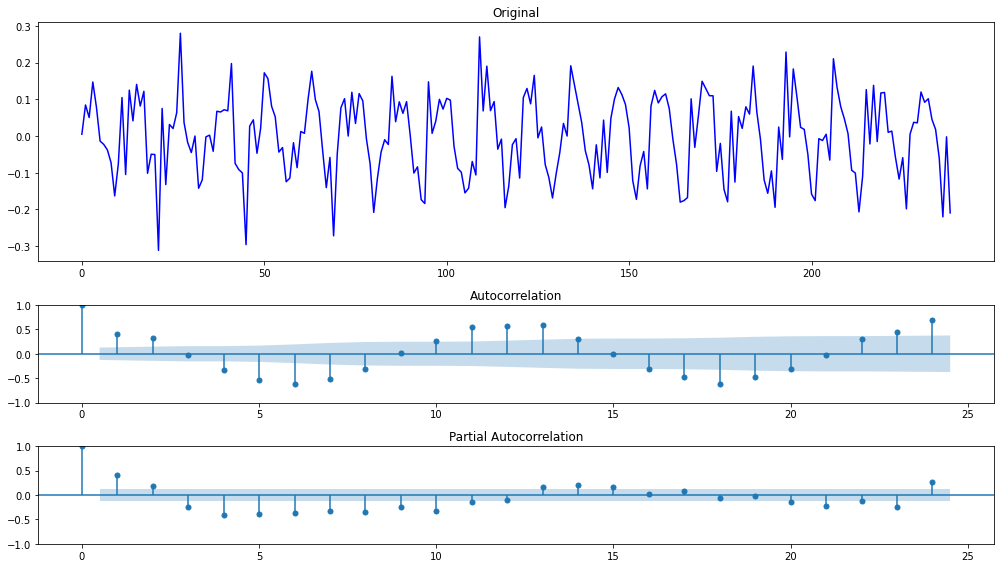

In [12]:
transform_to_stationary(
    series=all_series['Mean monthly air temperature (Deg. F) Nottingham Castle'],
    normalization_callback=normalization_series,
    differentiation_callback=differentiation_series)

### Временной ряд - Weekly closings of the Dow-Jones industrial average

Нормализуем дисперсию:


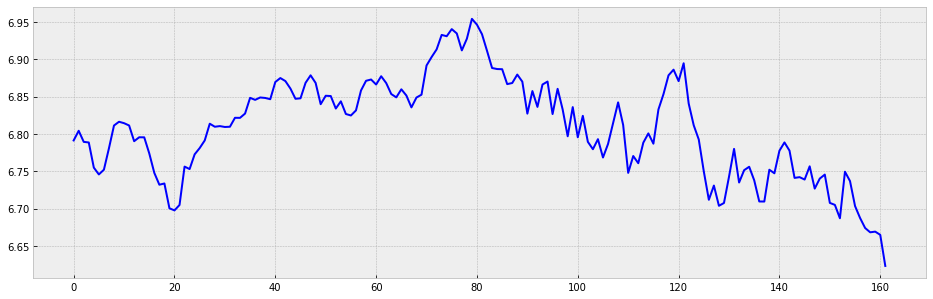

Дифференцируем:


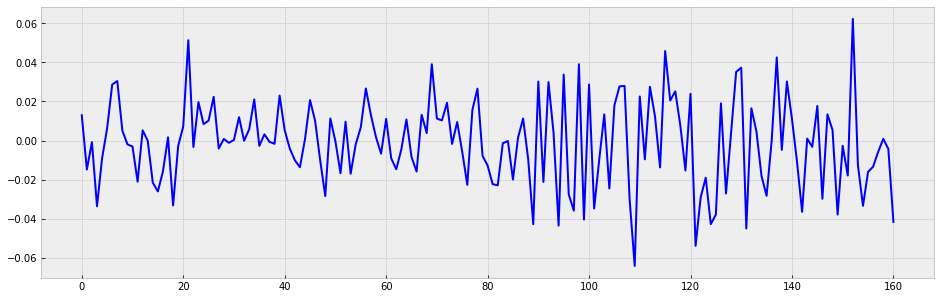

Тест Dickey-Fuller:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64

Коррелограммы:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


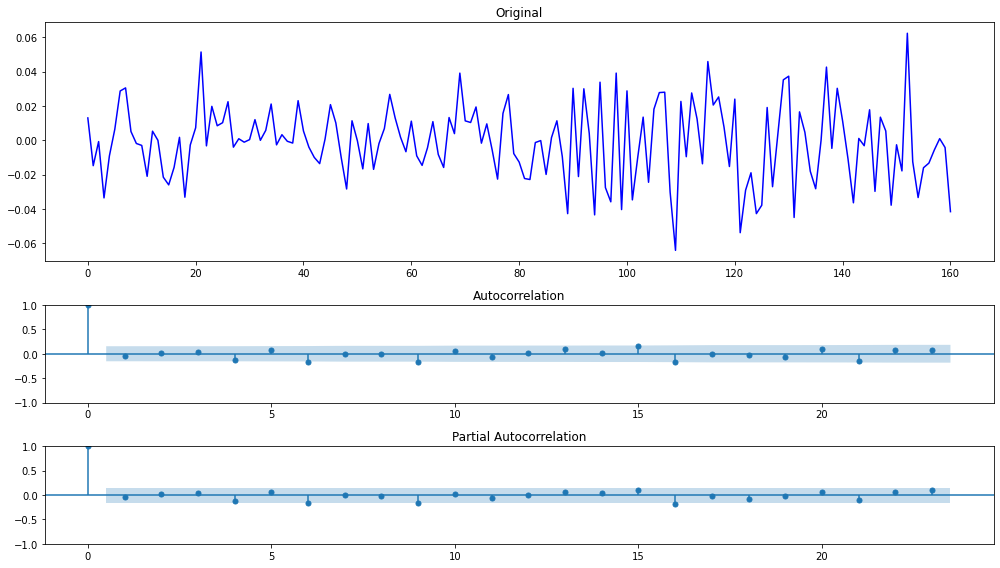

In [13]:
transform_to_stationary(
    series=all_series['Weekly closings of the Dow-Jones industrial average'],
    normalization_callback=normalization_series,
    differentiation_callback=differentiation_series)

### Временной ряд - Daily total female births in California

Нормализуем дисперсию:


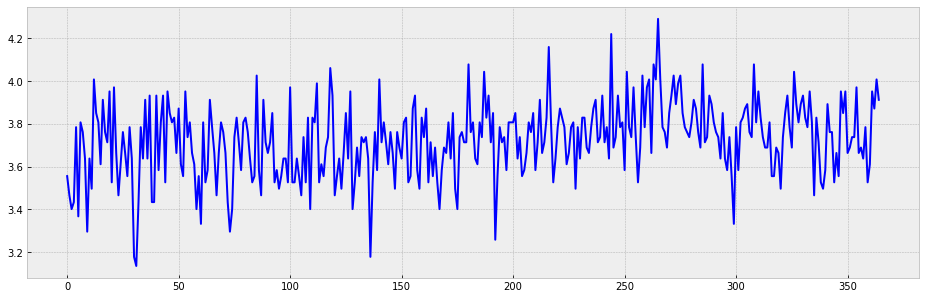

Дифференцируем:


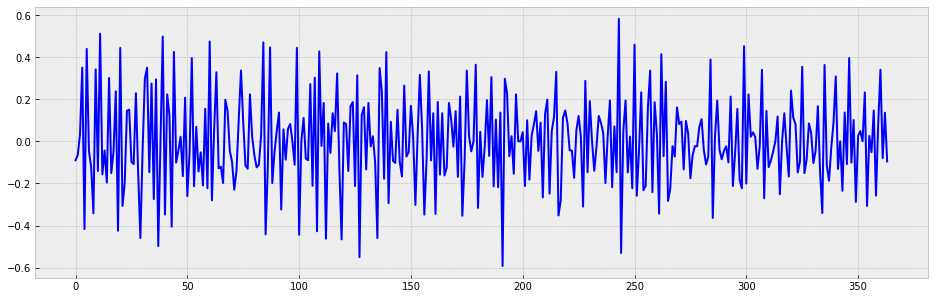

Тест Dickey-Fuller:
Test Statistic                -1.296334e+01
p-value                        3.191205e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64

Коррелограммы:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


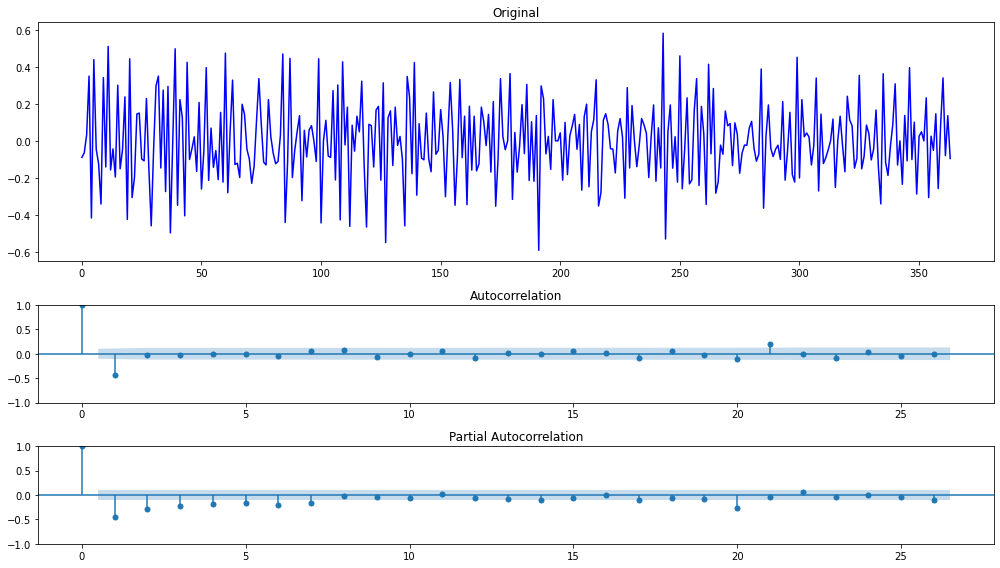

In [14]:
transform_to_stationary(
    series=all_series['Daily total female births in California'],
    normalization_callback=normalization_series,
    differentiation_callback=differentiation_series)